<h1>This is an intro into image processing
</h1>

<h3>Concepts you will learn</h3>
<ul>
    <li>Data types and structures</li>
    <li>Image types and color channels</li>
    <li>Pixel maniuplation and filtering</li>
    <li>Blur, dialation, and erosion</li>
    <li>Scale and rotate images</li>
</ul>

<h3 >1. Getting Started with OpenCV
</h3>
<p>We need to import <b>cv2</b> which is the library name, and numpy since <b>cv2</b> uses numpy arrays</p>


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

<p>1.1 To read an image we use the <b>imread</b> functio inside <b>cv2</b> library</p>
<p>Note: This function will return <b>None</b> if it cannot find the image</p>

In [6]:
image = cv2.imread("butterfly.jpg")

<p>1.2 If we print out <b>image</b> we will see the array of pixels</p>
<p>Similarly, if we print out the type we will see that it is a numpy array</p>

In [4]:
print(image)
type(image)

[[[ 47  88  50]
  [ 47  88  50]
  [ 48  87  49]
  ...
  [170 150 145]
  [172 151 154]
  [174 150 162]]

 [[ 50  91  53]
  [ 48  89  51]
  [ 46  85  47]
  ...
  [171 150 149]
  [173 151 156]
  [174 151 165]]

 [[ 53  94  56]
  [ 48  89  51]
  [ 43  82  44]
  ...
  [168 149 152]
  [171 152 161]
  [172 153 168]]

 ...

 [[ 43 123  58]
  [ 44 122  58]
  [ 46 121  59]
  ...
  [103 223 218]
  [ 94 214 203]
  [ 88 205 190]]

 [[ 41 121  56]
  [ 42 120  56]
  [ 45 120  58]
  ...
  [103 223 218]
  [ 95 217 206]
  [ 92 209 194]]

 [[ 45 125  60]
  [ 46 124  60]
  [ 49 124  62]
  ...
  [103 223 218]
  [ 97 219 208]
  [ 96 213 198]]]


numpy.ndarray

<p>We can also see the shape of the array by doing this:</p>

In [5]:
image.shape

(356, 493, 3)

<p>In this case the first value is the number of rows, the second is the number of columns, and the third value is the number of color channels (red, green, blue).</p>

<p>Since <b>imshow</b> works with np arrays, we could create any sort of image we want, if we specifiy the correct dimensions.</p> <p>For example, if we wanted to create an all black image we could do:</p>

In [4]:
blackImage = np.zeros([150,200,1],'uint8')
cv2.imshow("Black",blackImage)
blkImage = np.zeros([150,200,3],'uint8') #Another way to make a black image
blkImage[:,:] = (0,0,0) # Sets the color channels to the rgb format for black
cv2.imshow("Blk",blkImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

<p>Another way to draw images is with <b>matplotlib</b>.</p>
<p>Of course when doing this, we need to make sure that we convert the image into RGB, because by default 
    cv2 reads it in as BGR</p>

In [5]:
plt.imshow(image) # Image before correction
plt.show()

NameError: name 'image' is not defined

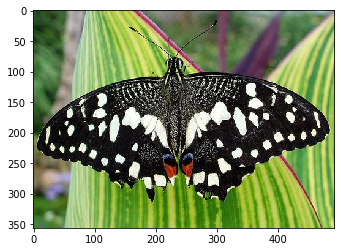

In [9]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image) # Image after correction
plt.show()

<h3>2. Pixel maniuplation and filtering </h3>

<p>2.1 Again lets start by reading in an image</p>

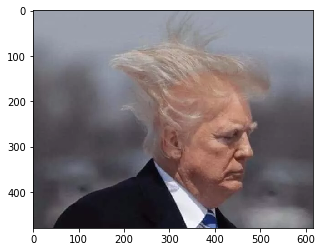

In [7]:
colorImage = cv2.imread("donald.jpg",1)
colorImage = cv2.cvtColor(colorImage, cv2.COLOR_BGR2RGB)
plt.imshow(colorImage) 
plt.show() 

<p>2.2 Convert the image to gray scale</p>

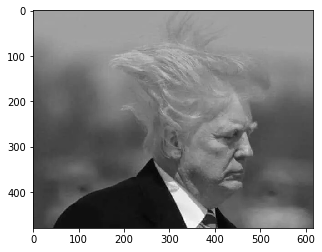

In [16]:
grayImage = cv2.cvtColor(colorImage, cv2.COLOR_RGB2GRAY)
grayImage = cv2.cvtColor(grayImage, cv2.COLOR_BGR2RGB) #Again we need to convert this 
plt.imshow(grayImage) 
plt.show() 

<p>2.3 Convert image into rgba (red, green, blue, alpha)</p>
<p>Lets start by seperating the color channels</p>

In [23]:
b = colorImage[:,:,0]
g = colorImage[:,:,1]
r = colorImage[:,:,2]
rgba = cv2.merge((b,g,r,b)) # meerge will take the color channels and merge them into an image
cv2.imwrite("rgba.png",rgba) # we will write this to a png, because jpg will omit the aplha channel 

True

<h3>3. Blur, dialation, erosion</h3>

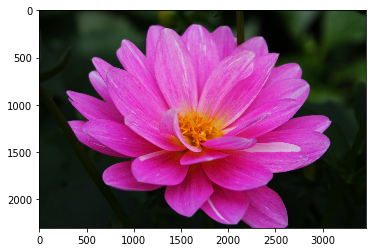

In [29]:
gPreBlurPic = cv2.imread("flower.jpg",1)
gPreBlurPic = cv2.cvtColor(gPreBlurPic, cv2.COLOR_BGR2RGB) 
plt.imshow(gPreBlurPic)
plt.show()

<p>3.1 Now lets apply a Gaussian blur to the photo</p> 
<p>We can do this with the <b>GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType=BORDER_DEFAULT]]] )</b></p> 
<p>For this example our first parameter is our image, second is our blur amount (x dir, y dir) which should be odd values, and our third is a default value, we just put 0</p>

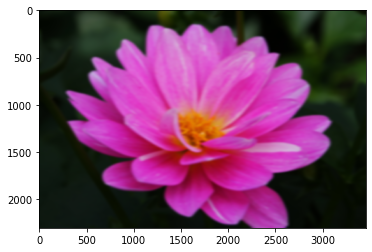

In [37]:
gPostBlurPic = cv2.GaussianBlur(gPreBlurPic, (99,55),0) 
plt.imshow(gPostBlurPic)
plt.show()

<p>3.2 